<a href="https://colab.research.google.com/github/paulsoumyadip/topic_modelling_on-_BBC_articles/blob/main/Topic_modelling_on_BBC_news_article.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROJECT NAME: TOPIC MODELLING ON BBC NEWS ARTICLE**

*** ***
*  ##### **Project Type**    - Unsupervised
*  ##### **Contribution**    - Team
*  ##### **Team Member 1 -** Soumyadip Paul 
*  ##### **Team Member 2 -** Aishwarya K P
*  ##### **Team Member 3 -** Akshat Raj Kumawat


*******
* # **Github LINK-**

* Enter
* Link
* Here

# **PROJECT SUMMARY:**

Enter contributions here

# **PROBLEM DESCRIPTION:**

BBC stands for British Broadcasting Corporation.

It is an operational business division of the British Broadcasting Corporation (BBC) responsible for the gathering and broadcasting of news and current affairs in the UK and around the world. The department is the world's largest broadcast news organisation and generates about 120 hours of radio and television output each day, as well as online news coverage.

The service maintains 50 foreign news bureaus with more than 250 correspondents around the world.

BBC News Online is the BBC's news website. It is one of the most popular news websites in the UK, reaching over a quarter of the UK's internet users, and worldwide, with around 14 million global readers every month.

The website contains international news coverage as well as articles based on entertainment, sport, science, and political news.

In this project the task is to identify major themes/topics across a collection of BBC news articles.

* # **BUSINESS CONTEXT:**
* The BBC is one of the world's largest and most respected news organizations, providing news, information, and analysis to a global audience. However, with a vast amount of news articles published every day, it can be challenging for readers to quickly and efficiently find articles on specific topics of interest.
* To address this issue we can create a machine learning (ML) model that can automatically identify the topics of each article and categorize them accordingly. This model would be trained on a vast corpus of BBC news articles and use advanced natural language processing (NLP) techniques to extract key topics and themes from the text.
* This would enhance the user experience, making it easier for readers to find relevant articles and stay up-to-date on the latest news in their areas of interest.
* Additionally, the topic model could be used internally by the BBC's editorial team to assist with content curation and to identify emerging trends and themes in the news. This would help the BBC to provide more timely and relevant coverage of the topics that matter most to its audience.

*Data-Set used from the publication: - D. Greene and P. Cunningham. "Practical Solutions to the Problem of Diagonal Dominance in Kernel Document Clustering", Proc. ICML 2006.*

# **DATA PREPARATION:**

In [ ]:
# mounting the drive to load the dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

# importing CountVectorizer for feature extraction
from sklearn.feature_extraction.text import CountVectorizer

# Importing data manipulation libraries
import numpy as np
import pandas as pd

# importing tqdm and display modules for progress meters/bars
from IPython.display import display
from tqdm import tqdm

# importing wordcloud to represent topics wordcloud
from wordcloud import WordCloud

# Model selection modules
from sklearn.model_selection import train_test_split, KFold
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer

from collections import Counter

import ast

# importing data visualization modules
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE

# importing mlab for implementing MATLAB functions
import matplotlib.mlab as mlab

# importing statistics module
import scipy.stats as stats

# importing decomposition modules
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation

# importing Natural Language Toolkit and other NLP modules
import nltk
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob, Word

# Importing warnings library. The warnings module handles warnings in Python.
import warnings
warnings.filterwarnings('ignore')

*The dataset in this case isn't collective, its been stored in form of numerous text files sub-categorized in 5 different domains. Hence, for loading the data we'll visit all text files individually and copy all articles to a dataframe along with their category.*

In [ ]:
# The variable "directory" holds the address of text files stored in drive
directory = '/content/drive/MyDrive/Colab Notebooks/AlmaBetter/Capstone Projects/Unsupervised Capstone/Data Sets/bbc'

# All 5 sub-categories provided
subdirs = ['business', 'entertainment', 'politics', 'sport', 'tech']

# Create dataframe for gathering the articles
bbc = pd.DataFrame()
 
# Iterate over sub-directories to access the text files
for subdir in subdirs:

  # address to the subdirectory
  dir = directory + '/' + subdir

  # Iterate over all the text files present in a sub-directory
  for filename in os.listdir(dir):
    
    # Get file address
    filepath = os.path.join(dir, filename)

    # Traversing over text files and storing the articles into the dataframe
    try:
      data = open(filepath,'r').read()

      # escape characters to be ignored in the text
      escape = ['\n']
      
      # removing escape characters from text
      for elem in escape:
        data = data.replace(elem, ' ')
      
      # Storing article to the dataframe
      dict1 = {'Filename': filename.split('.')[0], 'Contents': data.lower(), 'Category':subdir}
      bbc = bbc.append(dict1, ignore_index=True, verify_integrity = True)

    # Ignore exception, if any
    except:
      pass    

*The dataset contains a set of news articles for each major segment consisting of business, entertainment, politics, sports and technology. There are over 2000 news article available in these categories.*

In [ ]:
bbc.sample(10)

,Filename,Contents,Category
2161,266,blinx sequel purrs nicely the original blinx ...,tech
774,095,aviator wins top globes accolades the aviator...,entertainment
1269,029,uk set to cut back on embassies nine overseas...,politics
2038,333,us woman sues over ink cartridges a us woman ...,tech
1435,390,dawson set for new wasps contract european ch...,sport
892,034,vera drake scoops film award oscar hopefuls m...,entertainment
1174,181,"school sport 'is back', says pm tony blair ha...",politics
564,348,berlin celebrates european cinema organisers ...,entertainment
998,285,hague 'given up' his pm ambition former conse...,politics
487,061,further rise in uk jobless total the uk's job...,business


##### **The dataset consists of 4 columns:**

* *Index : Entry number*
* *Filname : Destination File Name/ Number*
* *Contents : Complete transcript of the article, the complete textual data*
* *Category : Article topic*

In [ ]:
bbc.shape

(2224, 3)

*Let's check for duplicates cause having duplicates will result in inconsistencies*

In [ ]:
bbc.duplicated(subset = ['Contents']).sum()

99

In [ ]:
bbc.drop_duplicates(subset = ['Contents'],inplace = True)
bbc

,Filename,Contents,Category
0,485,swiss cement firm in buying spree swiss cemen...,business
1,499,china aviation seeks rescue deal scandal-hit ...,business
2,504,aids and climate top davos agenda climate cha...,business
3,505,china now top trader with japan china overtoo...,business
4,510,lacroix label bought by us firm luxury goods ...,business
...,...,...,...
2219,191,online commons to spark debate online communi...,tech
2220,219,disney backs sony dvd technology a next gener...,tech
2221,168,a decade of good website design the web looks...,tech
2222,164,who do you think you are? the real danger is ...,tech


# **DATA WRANGLING AND VISUALIZATION:**

*Let's add a column which shows us the number of words used in each article*

In [ ]:
bbc['Contents_len'] = bbc['Contents'].str.len()

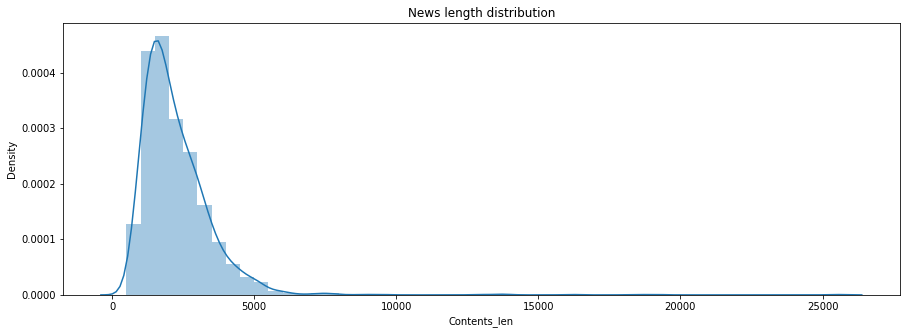

In [ ]:
plt.figure(figsize=(15, 5))
sns.distplot(bbc['Contents_len']).set_title('News length distribution');

In [ ]:
bbc

,Filename,Contents,Category,Contents_len
0,485,swiss cement firm in buying spree swiss cemen...,business,1501
1,499,china aviation seeks rescue deal scandal-hit ...,business,1381
2,504,aids and climate top davos agenda climate cha...,business,2715
3,505,china now top trader with japan china overtoo...,business,1485
4,510,lacroix label bought by us firm luxury goods ...,business,890
...,...,...,...,...
2219,191,online commons to spark debate online communi...,tech,3706
2220,219,disney backs sony dvd technology a next gener...,tech,1936
2221,168,a decade of good website design the web looks...,tech,3292
2222,164,who do you think you are? the real danger is ...,tech,5184


*Checking the number of Article per categories:* 

In [ ]:
cat_count =bbc.groupby(['Category'],)['Category'].count()

Text(0.5, 1.0, 'Count per Category')

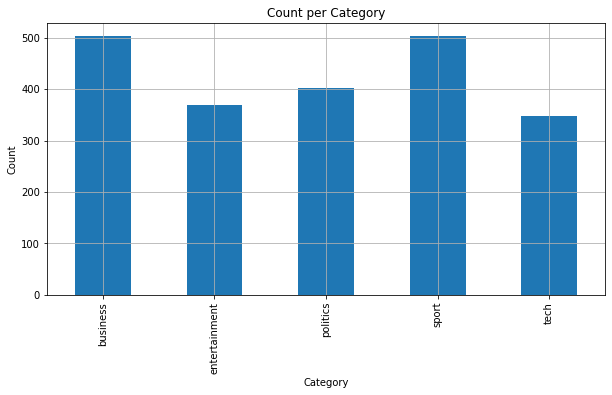

In [ ]:
plt.figure(figsize=(10,5))
cat_count.plot(kind ='bar', grid =True)
plt.ylabel("Count")
plt.title("Count per Category")

##### **Let's Check the textual content of the Data:**

In [ ]:
content = bbc.reset_index()
content = content['Contents']
content

0       swiss cement firm in buying spree  swiss cemen...
1       china aviation seeks rescue deal  scandal-hit ...
2       aids and climate top davos agenda  climate cha...
3       china now top trader with japan  china overtoo...
4       lacroix label bought by us firm  luxury goods ...
                              ...                        
2120    online commons to spark debate  online communi...
2121    disney backs sony dvd technology  a next gener...
2122    a decade of good website design  the web looks...
2123    who do you think you are?  the real danger is ...
2124    learning to love broadband  we are reaching th...
Name: Contents, Length: 2125, dtype: object

*Removing the punctuations from our corpuses*

In [ ]:
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space, 
    # which in effect deletes the punctuation marks 
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [ ]:
bbc['Contents'] = bbc['Contents'].apply(remove_punctuation)
bbc.head(10)

,Filename,Contents,Category,Contents_len
0,485,swiss cement firm in buying spree swiss cemen...,business,1501
1,499,china aviation seeks rescue deal scandalhit j...,business,1381
2,504,aids and climate top davos agenda climate cha...,business,2715
3,505,china now top trader with japan china overtoo...,business,1485
4,510,lacroix label bought by us firm luxury goods ...,business,890
5,473,two nigerian banks set to merge nigerian bank...,business,964
6,466,high fuel costs hit us airlines two of the la...,business,1837
7,508,healthsouth exboss goes on trial the former h...,business,1401
8,481,christmas sales worst since 1981 uk retail sa...,business,2163
9,479,ford gains from finance not cars ford the us ...,business,2209


* **CountVectorizer(Top Words):**
 
In order to use textual data for predictive modeling, the text must be parsed to remove certain words – this process is called **Tokenization.**

These words then need to be encoded as integers, or floating-point values, such that they can be used as inputs in machine learning algorithms. *This process is called Feature Extraction (or Vectorization).*

In [ ]:
# Function to extract top n words with highest frequency
def get_top_n_words(n_top_words, count_vectorizer, text_data):
    '''
    The function returns a tuple of the top n words in a sample and their 
    accompanying counts, given a CountVectorizer object and text sample as inputs
    '''
    # encoding the document using countvectorizer object
    vectorized_content = count_vectorizer.fit_transform(text_data.values)
    vectorized_total = np.sum(vectorized_content, axis=0)

    # extracting specifics for words
    word_indices = np.flip(np.argsort(vectorized_total)[0,:], 1)
    word_values = np.flip(np.sort(vectorized_total)[0,:],1)

    # creating a vector matrix for words
    word_vectors = np.zeros((n_top_words, vectorized_content.shape[1]))
    for i in range(n_top_words):
        word_vectors[i,word_indices[0,i]] = 1

    # display Vector matrix
    print(word_vectors)

    # collect the words
    words = [word[0].encode('ascii').decode('utf-8') for 
             word in count_vectorizer.inverse_transform(word_vectors)]

    return (words, word_values[0,:n_top_words].tolist()[0])

*Removing stopword using NLTK:*

In [ ]:
# dowloading nltk stopwords module
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# extracting all stopwords for english language
stop = nltk.corpus.stopwords.words('english')
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


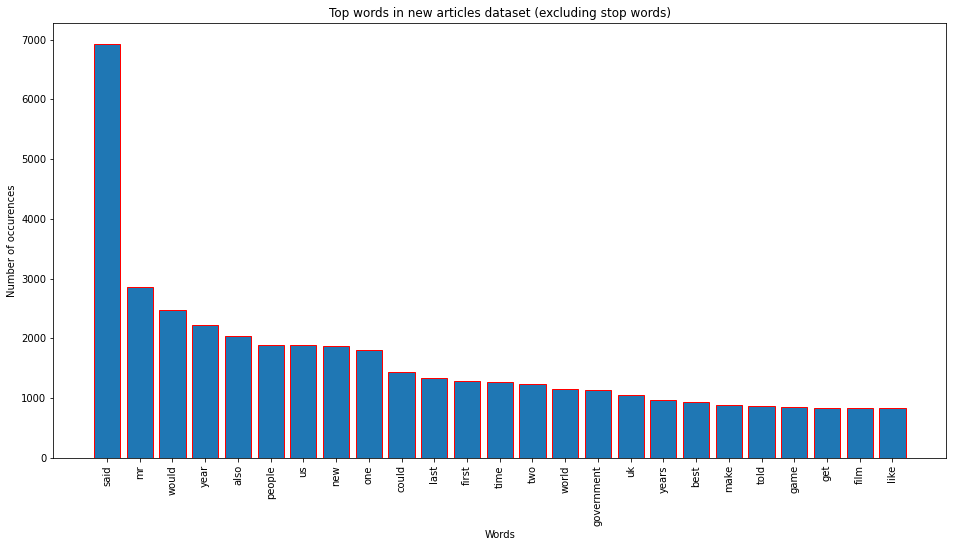

In [ ]:
# creating vectorizer object
count_vectorizer = CountVectorizer(stop_words=stop)

# calling the function to get words and their counts
words, word_values = get_top_n_words(n_top_words=25,
                                     count_vectorizer=count_vectorizer, 
                                     text_data=content)

# display top 25 words using bar plot
fig, ax = plt.subplots(figsize=(16,8))
ax.bar(range(len(words)), word_values, edgecolor='red')
ax.set_xticks(range(len(words)))
ax.set_xticklabels(words, rotation='vertical')
ax.set_title('Top words in new articles dataset (excluding stop words)')
ax.set_xlabel('Words')
ax.set_ylabel('Number of occurences')
plt.show()

Let's Create wordclouds for different topics:

In [ ]:
from wordcloud import WordCloud ,STOPWORDS
def create_wordcloud(words):
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(words)
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

#### **BUSINESS:**

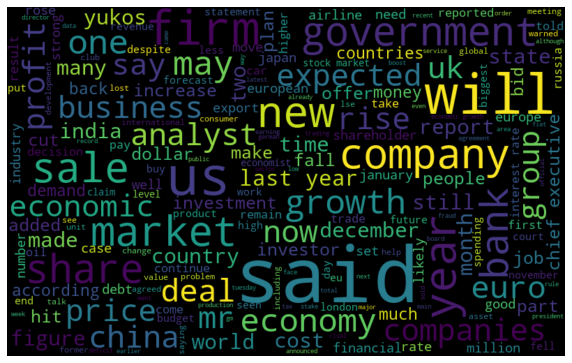

In [ ]:
subset=bbc[bbc.Category=="business"]
text=subset.Contents.values
words =" ".join(text)
create_wordcloud(words)

#### **ENTERTAINMENT:**

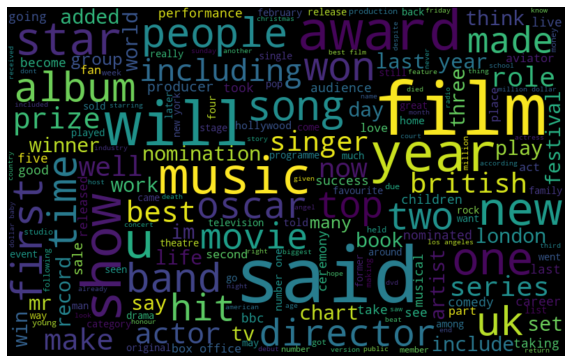

In [ ]:
subset=bbc[bbc.Category=="entertainment"]
text=subset.Contents.values
words =" ".join(text)
create_wordcloud(words)

#### **POLITICS:**

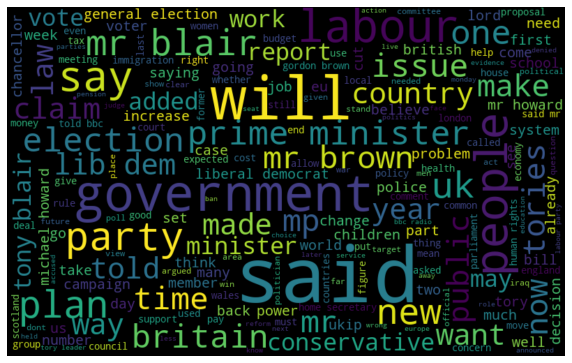

In [ ]:
subset=bbc[bbc.Category=="politics"]
text=subset.Contents.values
words =" ".join(text)
create_wordcloud(words)

#### **SPORTS:**


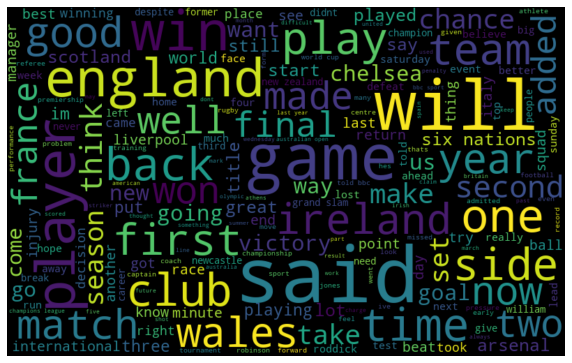

In [ ]:
subset=bbc[bbc.Category=="sport"]
text=subset.Contents.values
words =" ".join(text)
create_wordcloud(words)

#### **TECHNOLOGY:**

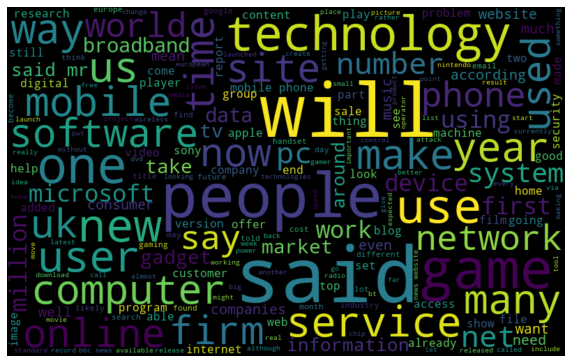

In [ ]:
subset=bbc[bbc.Category=="tech"]
text=subset.Contents.values
words =" ".join(text)
create_wordcloud(words)

##### *STEMMING AND LEMMATIZING THE DATA*
* *Stemming:* is the process of reducing a word to its word stem that affixes to suffixes and prefixes or to the roots of words known as a lemma. Stemming is important in natural language understanding (NLU) and natural language processing (NLP).

* *Lemmatization:* This algorithm collects all inflected forms of a word in order to break them down to their root dictionary form or lemma. Words are broken down into a part of speech (the categories of word types) by way of the rules of grammar.